In [1]:
### Benjamin Tollison Hw5 ###
import sympy as sp
from IPython.display import display, Math, Latex
from sympy.solvers.solveset import linsolve
from sympy import  lambdify, Matrix,sin,cos, sinh, cosh, exp, pi, symbols, integrate
import numpy as np
import matplotlib.pyplot as plt
def displayEquations(LHS,RHS):
    left = sp.latex(LHS)
    right = sp.latex(RHS)
    display(Math(left + '=' + right))
    np.set_printoptions(suppress=True)

In [2]:
#### Interpolation functions for N ####
a,b,c,d,x,L = symbols('a b c d,x,L')
G = Matrix([1,x,x**2,x**3]).T
Delta = Matrix([a,b,c,d])
H = Matrix([[G.subs({x:0})],
            [G.diff().subs({x:0})],
            [G.subs({x:L})],
            [G.diff().subs({x:L})]])
displayEquations('H',H)
displayEquations('H_inverted',H.inv())
q = H @ Delta
N = G @ H.inv()
displayEquations('N',N.T)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3]:
#### Problem 3 ####
x,L,f_1,f_2,E,I,M,V,M_0,M_L,V_0,M_L,V_L = symbols('x,L,f_1,f_2,E,I,M,V,M_0,M_L,V_0,M_L,V_L')
N = N.T # Matrix([[1-3*x**2/L**2+2*x**3/L**3],[x-2*x**2/L+x**3/L**2],[3*x**2/L**2-2*x**3/L**3],[-x**2/L+x**3/L**2]])
displayEquations('N',N)
DN = N.diff(x)
D2N = DN.diff(x)
displayEquations('DN',DN)
displayEquations('D2N',D2N)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
DK = E*I * D2N @ D2N.T
K = sp.integrate(DK,(x,0,L))
displayEquations('K',K)
f = (f_2 - f_1)*x/L + f_1
DF_dist = f*N
F_dist = integrate(DF_dist,(x,0,L)).factor(L)
F_bc = Matrix([[M_0*DN[0].subs({x:0}) + V_0*N[0].subs({x:0})],
                [M_0*DN[1].subs({x:0}) + V_0*N[1].subs({x:0})],
                [M_L*DN[2].subs({x:L}) + V_L*N[2].subs({x:L})],
                [M_L*DN[3].subs({x:L}) + V_L*N[3].subs({x:L})]])
F_eq = F_bc + F_dist
displayEquations('F_eq',F_eq)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
#### Problem 6 ####
K = np.array([[120,600,-120,600],[600,4000,-600,2000],[-120,-600,120,-600],[600,2000,-600,4000]])
F_eq = np.array([15,100/3,35,-50])
q = np.array([5.3241,-0.41111,0,0])
Forces = K@q - F_eq
print(Forces)

[ 377.226      1516.68666667 -427.226      2422.24      ]


In [6]:
#### Problem 14 ####
b,h,y,P = symbols('b h y P')
    # element 1
DK = E*I * D2N @ D2N.T
K_1 = integrate(DK,(x,0,2*L))
displayEquations('K_1',K_1)
f1 = 10
f2 = (f_2 - f_1)*x/L
DF_dist = f1*N
F_dist1 = integrate(DF_dist,(x,0,2*L)).factor(L)
F_bc1 = Matrix([[M_0*DN[0].subs({x:0}) + V_0*N[0].subs({x:0})],
                [M_0*DN[1].subs({x:0}) + V_0*N[1].subs({x:0})],
                [M_L*DN[2].subs({x:2*L}) + V_L*N[2].subs({x:2*L})],
                [M_L*DN[3].subs({x:2*L}) + V_L*N[3].subs({x:2*L})]])
displayEquations('F_dist1',F_dist1)
displayEquations('F_bc1',F_bc1.subs({M_0:0,V_0:0,V_L:P,M_L:0}))
alpha = 13*10**-6
Delta_T = -400*y/h
F_T1 = -integrate((integrate(b*E*alpha*Delta_T*y*D2N,(y,-h/2,h/2))),(x,0,2*L))
displayEquations('F_T1',F_T1.subs({h:.5,E:10**7,b:.4,L:10}))
F_eq1 = F_dist1 + F_bc1.subs({M_0:0,V_0:0,V_L:P,M_L:0}) + F_T1
displayEquations('F_eq1',F_eq1)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
    # element 2
K_2 = integrate(DK,(x,0,L))
F_dist2 = F_dist1 = integrate(f2*N,(x,0,L)).factor(L)
F_T2 = -integrate((integrate(b*E*alpha*Delta_T*y*D2N,(y,-h/2,h/2))),(x,0,L))
F_bc2 = Matrix([[M_0*DN[0].subs({x:0}) + V_0*N[0].subs({x:0})],
                [M_0*DN[1].subs({x:0}) + V_0*N[1].subs({x:0})],
                [M_L*DN[2].subs({x:L}) + V_L*N[2].subs({x:L})],
                [M_L*DN[3].subs({x:L}) + V_L*N[3].subs({x:L})]])
displayEquations('K_2',K_2)
displayEquations('F_T2',F_T2.subs({h:.5,E:10**7,b:.4,L:10}))
displayEquations('F_dist2',F_dist2)
displayEquations('F_bc2',F_bc2.subs({M_0:0,V_0:P,V_L:0,M_L:0}))
F_eq2 = F_dist2 + F_T2 + F_bc2.subs({M_0:0,V_0:P,V_L:0,M_L:0})
displayEquations('F_eq2',F_eq2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
# Plugging values and assembling the global matrix
(K_1,K_2,F_eq1,F_eq2) = (K_1.subs({E:10**7,I:(1/12)*.4*.5**3,L:10}),
                           K_2.subs({E:10**7,I:(1/12)*.4*.5**3,L:10}),
                           F_eq1.subs({P:200,b:.4,h:.5,L:10,E:10**7}),
                           F_eq2.subs({P:200,b:.4,h:.5,L:10,f_1:0,f_2:10,E:10**7}))
displayEquations('K_1',K_1)
displayEquations('K_2',K_2)
displayEquations('F_eq1',F_eq1)
displayEquations('F_eq2',F_eq2)
global_K = np.zeros((6,6))
global_Feq = np.zeros(6)
global_K[0,0],global_K[0,1],global_K[0,2],global_K[0,3],global_K[0,4],global_K[0,5] = K_1[0,0],K_1[0,1],0,0,K_1[0,2],K_1[0,3]
global_K[1,0],global_K[1,1],global_K[1,2],global_K[1,3],global_K[1,4],global_K[1,5] = K_1[1,0],K_1[1,1],0,0,K_1[1,2],K_1[1,3]
global_K[2,0],global_K[2,1],global_K[2,2],global_K[2,3],global_K[2,4],global_K[2,5] = 0,0,K_2[2,2],K_2[2,3],K_2[2,0],K_2[2,1]
global_K[3,0],global_K[3,1],global_K[3,2],global_K[3,3],global_K[3,4],global_K[3,5] = 0,0,K_2[3,2],K_2[3,3],K_2[3,0],K_2[3,1]
global_K[4,0],global_K[4,1],global_K[4,2],global_K[4,3],global_K[4,4],global_K[4,5] = K_1[0,2],K_1[0,3],K_2[0,2],K_2[0,3],K_1[2,2]+K_2[0,0],K_1[2,3]+K_2[0,1]
global_K[5,0],global_K[5,1],global_K[5,2],global_K[5,3],global_K[5,4],global_K[5,5] = K_1[3,0],K_1[3,1],K_2[1,2],K_2[1,3],K_1[3,2]+K_2[1,0],K_1[3,3]+K_2[1,1]
print(global_K)
global_Feq[0],global_Feq[1],global_Feq[2],global_Feq[3],global_Feq[4],global_Feq[5] = F_eq1[0],F_eq1[1],F_eq2[2],F_eq2[3],F_eq1[2]+F_eq2[0],F_eq1[3]+F_eq2[1]
print(global_Feq)



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[[  7000.          30000.              0.              0.
   -7000.          40000.        ]
 [ 30000.         133333.33333333      0.              0.
  -30000.         166666.66666667]
 [     0.              0.            500.          -2500.
    -500.          -2500.        ]
 [     0.              0.          -2500.          16666.66666667
    2500.           8333.33333333]
 [ -7000.          40000.           -500.           2500.
    7500.         -37500.        ]
 [ 40000.         166666.66666667  -2500.           8333.33333333
  -37500.         250000.        ]]
[  720.          2400.            35.           383.33333333
 -1105.         12400.        ]


In [9]:
# imposing kinematic constraints
q_zero = [0,1,2,3]
for i in q_zero:
    global_K[i][:] = 0
    global_K[:][i] = 0
    global_K[i][i] = 1
    global_Feq[i] = 0
# displacement
q = np.linalg.inv(global_K) @ (global_Feq)
print(q)

[0.         0.         0.         0.         0.40266667 0.11      ]


<IPython.core.display.Math object>

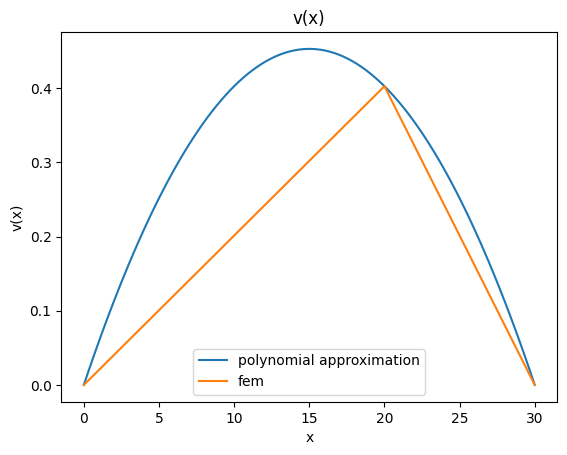

[0.020133333333333323, -0.040266666666666645]


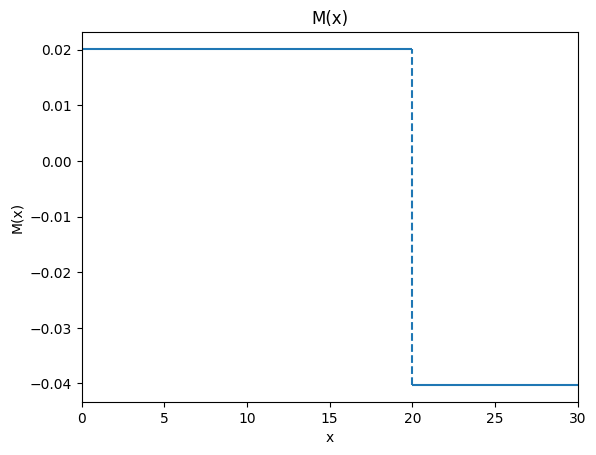

[0.021475555555555543]


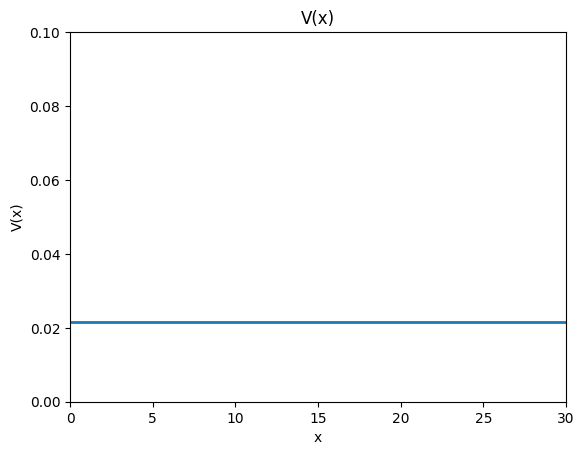

In [10]:
a,b,c = symbols('a b c')
v_x = a + b*x + c*x**2
v_fem = [0,q[4],0]
x_list = [0,20,30]
bc1 = v_x.subs({x:0})
bc2 = v_x.subs({x:30})
bc3 = v_x.subs({x:20}) - q[4]
dof = linsolve([bc1,bc2,bc3],[a,b,c])
(a_sol, b_sol, c_sol) = next(iter(dof))
v_x = v_x.subs({a:a_sol,b:b_sol,c:c_sol})
displayEquations('v_x',v_x)
v_np = lambdify(x,v_x)
x_values = np.linspace(0,30,100)
plt.plot(x_values,v_np(x_values),label='polynomial approximation')
plt.plot(x_list,v_fem,label='fem')
plt.legend()
plt.title('v(x)')
plt.xlabel('x')
plt.ylabel('v(x)')
plt.show()
M_fem = [(v_fem[1]-v_fem[0])/20,(v_fem[2]-v_fem[1])/10]
print(M_fem)
plt.hlines(M_fem[0],xmin=0,xmax=20)
plt.hlines(M_fem[1],xmin=20,xmax=30)
plt.vlines(20,M_fem[1],M_fem[0],linestyles='dashed')
plt.xlim(0,30)
plt.title('M(x)')
plt.xlabel('x')
plt.ylabel('M(x)')
plt.show()
V_fem = [M_fem[0]-M_fem[1]/30]
print(V_fem)
plt.hlines(y=V_fem[0],xmin=0,xmax=30,linewidth=2)
plt.title('V(x)')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.ylim(0,0.1)
plt.xlim(0,30)
plt.show()

In [11]:
#### Problem 17 ####
K = integrate(DK,(x,0,5)).subs({L:5,E:1*10**7,I:(1/12)*.4*.5**3})
displayEquations('K',K)
displayEquations('D2N',D2N.subs({L:5}))
Delta_T_y = (100+100)*y/h - 100
alpha = 10*10**-6
thermal = E * alpha * Delta_T_y*y
Q_T = -integrate(integrate(thermal.subs({E:10**7,h:2}),(y,-1,1))* D2N.subs({L:5}),(x,0,5))
displayEquations('Q_T',Q_T)
def length(element):
    nodes_location = [5,0,10]
    l = abs(nodes_location[element[1]-1] - nodes_location[element[0]-1])
    return l
def local_K(element):
    K =  np.array([[4000.0,10000.0,-4000.0,10000.0],
                  [10000.0,33333.3333333333,-10000.0,16666.6666666667],
                  [-4000.0,-10000.0,4000.0,-10000.0],
                  [10000.0,16666.6666666667,-10000.0,33333.3333333333]])
    return K
def global_K(connectivity):
    dof_list = [0,1,2,3,4,5]
    K = np.zeros((6,6))
    # for c in connectivity:
    #     for i in range(4):
    #         for j in range(4):
    #             K[i][j] += local_K(c)[i][j]
            
    for i in connectivity:
        K[i[0]*2-2][i[0]*2-2] += local_K(i)[0][0]
        K[i[0]*2-2][i[0]*2-2+1] += local_K(i)[0][1]
        K[i[0]*2-2][i[1]*2-2] += local_K(i)[0][2]
        K[i[0]*2-2][i[1]*2-2+1] += local_K(i)[0][3]
        
        K[i[0]*2-2+1][i[0]*2-2] += local_K(i)[1][0]
        K[i[0]*2-2+1][i[0]*2-2+1] += local_K(i)[1][1]
        K[i[0]*2-2+1][i[1]*2-2] += local_K(i)[1][2]
        K[i[0]*2-2+1][i[1]*2-2+1] += local_K(i)[1][3]
        
        K[i[1]*2-2][i[0]*2-2] += local_K(i)[2][0]
        K[i[1]*2-2][i[0]*2-2+1] += local_K(i)[2][1]
        K[i[1]*2-2][i[1]*2-2] += local_K(i)[2][2]
        K[i[1]*2-2][i[1]*2-2+1] += local_K(i)[2][3]
        
        K[i[1]*2-2+1][i[0]*2-2] += local_K(i)[3][0]
        K[i[1]*2-2+1][i[0]*2-2+1] += local_K(i)[3][1]
        K[i[1]*2-2+1][i[1]*2-2] += local_K(i)[3][2]
        K[i[1]*2-2+1][i[1]*2-2+1] += local_K(i)[3][3]
    return K
def global_Feq(connectivity):
    feq = np.zeros(6)
    Q_T = np.array([0,6666.66666666667,0,-6666.66666666667])
    for i in connectivity:
        feq[i[0]*2-2] += Q_T[0]
        feq[i[0]*2-1] += Q_T[1]
        feq[i[1]*2-2] += Q_T[2]
        feq[i[1]*2-1] += Q_T[3]
    feq[4] += -100
    return feq
nodes = [0,1,2]
node_connections = [[2,1],[1,3]]
# applying kinematics constraints
K = global_K(node_connections)
Feq = global_Feq(node_connections)
dof_zeros = [2,3]
for i in dof_zeros:
    K[i][:] = 0
    K[:][i] = 0
    K[i][i] = 1
    Feq[i] = 0
np.set_printoptions(suppress=True)
print(K)
print(Feq)
# solving for dof
q = np.linalg.inv(K) @ Feq
displayEquations('dof' , q)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[[  8000.              0.          -4000.         -10000.
   -4000.          10000.        ]
 [     0.          66666.66666667  10000.          16666.66666667
  -10000.          16666.66666667]
 [     0.              0.              1.              0.
       0.              0.        ]
 [     0.              0.              0.              1.
       0.              0.        ]
 [ -4000.         -10000.              0.              0.
    4000.         -10000.        ]
 [ 10000.          16666.66666667      0.              0.
  -10000.          33333.33333333]]
[    0.             0.             0.             0.
  -100.         -6666.66666667]


<IPython.core.display.Math object>

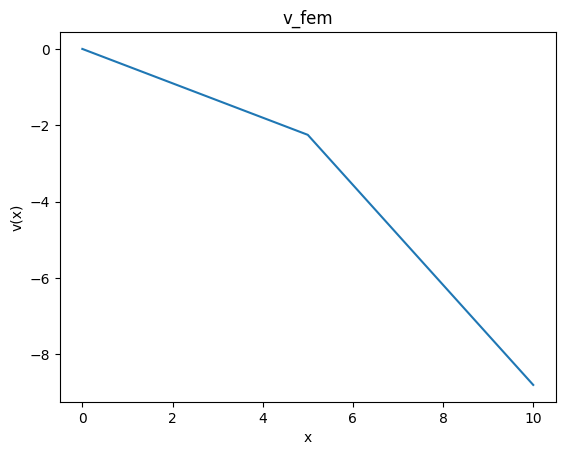

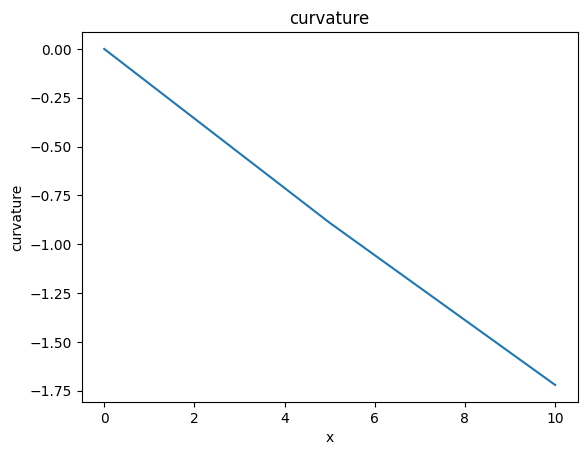

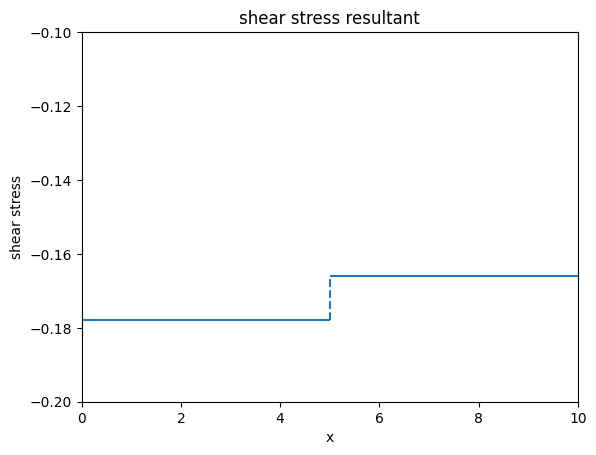

In [12]:
#plotting
v_fem = [0,q[0],q[4]]
curvature = [0,q[1],q[5]]
x_list = [0,5,10]
plt.plot(x_list,v_fem)
plt.title('v_fem')
plt.xlabel('x')
plt.ylabel('v(x)')
plt.show()
plt.plot(x_list,curvature)
plt.title('curvature')
plt.xlabel('x')
plt.ylabel('curvature')
plt.show()
shear_stress = [(curvature[1]-curvature[0])/(x_list[1]-x_list[0]),(curvature[2]-curvature[1])/(x_list[2]-x_list[1])]
plt.hlines(shear_stress[0],xmin=0,xmax=5)
plt.hlines(shear_stress[1],xmin=5,xmax=10)
plt.vlines(5,shear_stress[0],shear_stress[1],linestyles='dashed')
plt.xlim(0,10)
plt.ylim(-0.2,-0.1)
plt.title('shear stress resultant')
plt.xlabel('x')
plt.ylabel('shear stress')
plt.show()
